# Logistic Regression
A classification algorithm used to predict the probability of an instance belonging to a binary (or multi-class) category. Unlike linear regression, which predicts continuous values, logistic regression outputs probabilities using the sigmoid function.

- Sigmoid Function: σ(z)= 1 / 1 + e−z
- Logit Function: logit(p) = ln( p / 1−p ) = z

Decision Boundary:
For binary classification:
- σ(z)≥0.5, predict class 1.
- σ(z)<0.5, predict class 0.

**Evaluation Metrics**

- Accuracy: (TP + TN) / Total (misleading for imbalanced data).
- Precision: TP / (TP + FP) (focus on false positives).
- Recall: TP / (TP + FN) (focus on false negatives).
- F1 Score: Harmonic mean of precision and recall.
- ROC-AUC: Area under the receiver operating characteristic curve.

### ASSUMPTIONS In Logistic Regression
- The dependent Variable must be categorical in nature.
- The dependent variables must be independent.
- There should be no outliers in the data. Check for outliers.
- There should be no high correlations among the independent variables. This can be checked using correlation matrix.

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       122
           1       0.79      0.63      0.70        92

    accuracy                           0.77       214
   macro avg       0.78      0.75      0.76       214
weighted avg       0.77      0.77      0.77       214


Additional Metrics:
Accuracy : 0.7710280373831776
Precision: 0.7945205479452054
Recall   : 0.6304347826086957
F1 Score : 0.703030303030303
ROC AUC  : 0.7990912330719885


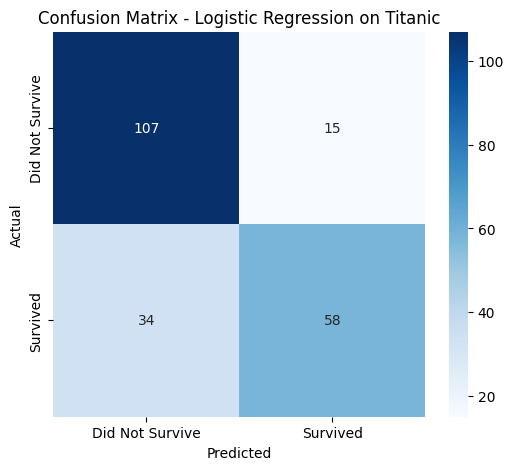

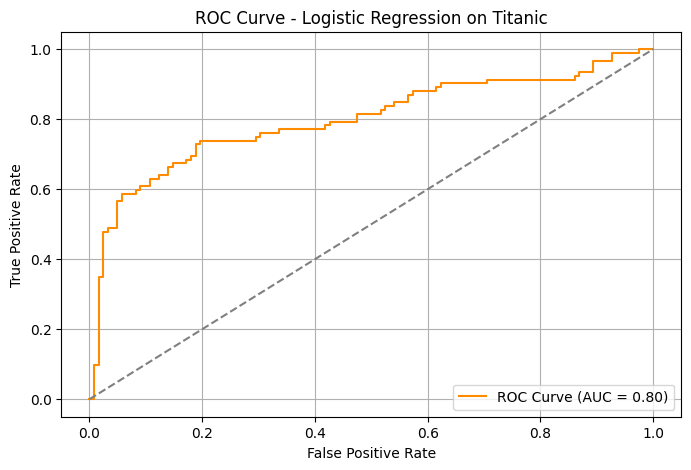

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

# Load Titanic dataset
titanic = sns.load_dataset('titanic')
titanic = titanic.dropna(subset=['age', 'embarked', 'fare'])

# Encode categorical variables
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Features and target
features = ['pclass', 'sex', 'age', 'fare', 'embarked']
X = titanic[features]
y = titanic['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Classification report
print(classification_report(y_test, y_pred))

# Additional evaluation metrics
print("\nAdditional Metrics:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC AUC  :", roc_auc_score(y_test, y_prob))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression on Titanic")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression on Titanic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Class distribution:
target
1    357
0    212
Name: count, dtype: int64

Accuracy: 0.9020979020979021

Confusion Matrix:
[[44 10]
 [ 4 85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        54
           1       0.89      0.96      0.92        89

    accuracy                           0.90       143
   macro avg       0.91      0.88      0.89       143
weighted avg       0.90      0.90      0.90       143



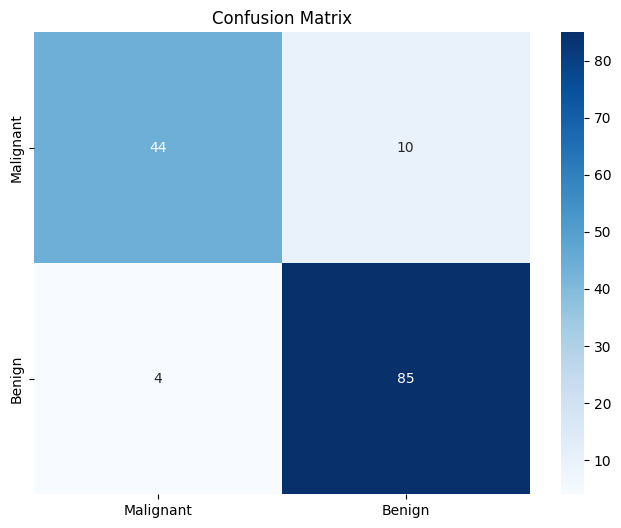

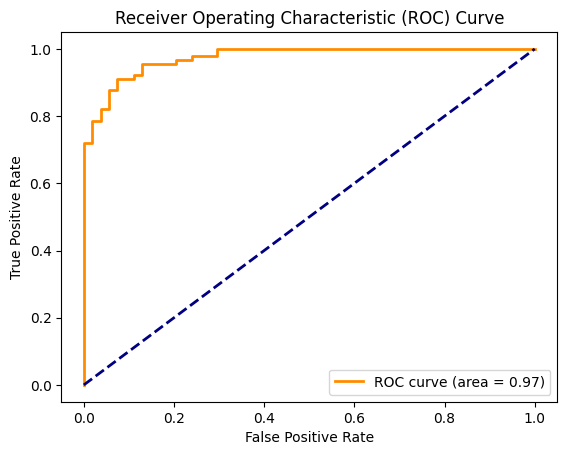

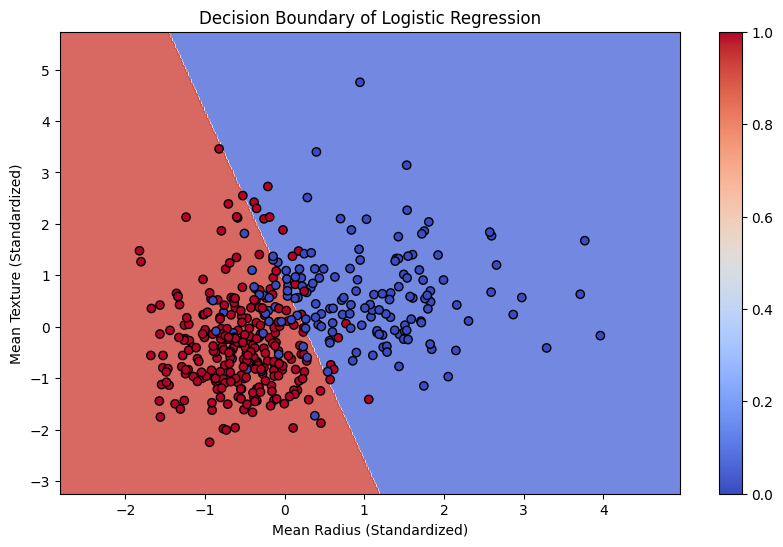


Feature Importance:
        Feature  Coefficient  Odds Ratio
0   mean radius    -3.005705    0.049504
1  mean texture    -0.886583    0.412061


In [8]:
# 1. Import Required Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# 2. Load and Explore Data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print("Class distribution:")
print(y.value_counts())  # 357 benign (1), 212 malignant (0)

# 3. Feature Selection & Preprocessing
# Select 2 key features for better visualization
selected_features = ['mean radius', 'mean texture']
X = X[selected_features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train Logistic Regression Model
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
model.fit(X_train_scaled, y_train)

# 5. Model Evaluation
# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Metrics
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 6. Visualization
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'], 
            yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 7. Decision Boundary Visualization
# Create mesh grid
h = 0.02  # Step size
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, 
            edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Mean Radius (Standardized)')
plt.ylabel('Mean Texture (Standardized)')
plt.title('Decision Boundary of Logistic Regression')
plt.colorbar()
plt.show()

# 8. Interpret Model Coefficients
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
})

print("\nFeature Importance:")
print(feature_importance)